# **Practica 1.0 Naturaleza del an√°lisis de las series de tiempo**

**Carrera:** Licenciatura en Ciencia de Datos

**Grupo:**  6AV1

**Materia:** An√°lisis de Series de Tiempo

**Docente:** Daniel Jim√©nez Alcantar

**Integrantes:**  

* Aguilar Ramirez Carlos Francisco
* Arista Romero Juan Ismael
* Jim√©nez Flores Luis Arturo
* Vazquez Martin Marlene Gabriela

Fecha de √∫ltima modificaci√≥n: 27/02/2025

# **Metodolog√≠a BOX-Jenkins para la serie de tiempo**


# **Dataset**

Este conjunto de datos contiene datos hist√≥ricos del precio de las acciones de Walmart Inc. (WMT) desde el 25 de agosto de 1972 hasta el 21 de febrero de 2025.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/SEPTIMO/SeriesDeTiempo/Practica1/WMT.csv")

Teniendo como base la siguiente imagen para delimitar dicha metodolog√≠a...

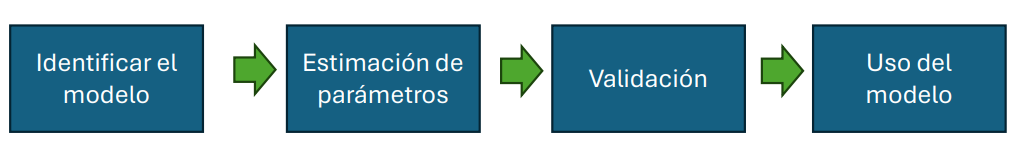

# 1. Identificaci√≥n (fase 1 de la metodolog√≠a)

En esta fase, el objetivo es explorar y preparar la serie para:

* Detectar si es estacionaria o no (en media, varianza y autocorrelaciones).

* Identificar posibles transformaciones (log, diferencias, etc.) para volverla estacionaria.

* Distinguir si hay estacionalidad y de qu√© tipo.

* Explorar la presencia de tendencias, picos, valles, y comportamientos c√≠clicos.

# **Exploraci√≥n y limpieza de datos**

* Carga del CSV, verificaci√≥n de valores nulos, ordenaci√≥n cronol√≥gica, conversi√≥n de fechas a datetime, etc.

In [ ]:
df.head()

date      open      high       low     close  \
0  1972-08-25 00:00:00-04:00  0.021159  0.021566  0.021159  0.021484   
1  1972-08-28 00:00:00-04:00  0.021484  0.021647  0.021403  0.021403   
2  1972-08-29 00:00:00-04:00  0.021322  0.021322  0.021159  0.021159   
3  1972-08-30 00:00:00-04:00  0.021159  0.021159  0.020996  0.021159   
4  1972-08-31 00:00:00-04:00  0.020996  0.020996  0.020833  0.020833   

   adj_close   volume  
0   0.011639  7526400  
1   0.011595  2918400  
2   0.011463  5836800  
3   0.011463  1228800  
4   0.011286  2611200

In [ ]:
df.tail()

date        open        high         low  \
13228  2025-02-14 00:00:00-05:00  105.300003  105.300003  103.599998   
13229  2025-02-18 00:00:00-05:00  103.720001  103.989998  102.510002   
13230  2025-02-19 00:00:00-05:00  103.849998  104.199997  102.550003   
13231  2025-02-20 00:00:00-05:00   98.779999  100.120003   96.680000   
13232  2025-02-21 00:00:00-05:00   96.529999   96.849998   94.120003   

            close   adj_close    volume  
13228  104.040001  104.040001  14109500  
13229  103.779999  103.779999  18247300  
13230  104.000000  104.000000  18508000  
13231   97.209999   97.209999  55450900  
13232   94.779999   94.779999  34972500

In [ ]:
df.describe()

open          high           low         close     adj_close  \
count  13233.000000  13233.000000  13233.000000  13233.000000  13233.000000   
mean      14.428567     14.558144     14.300811     14.432343     11.946184   
std       16.498454     16.627365     16.374295     16.506102     15.865462   
min        0.005208      0.005208      0.004801      0.005208      0.002839   
25%        0.557292      0.562500      0.552083      0.557292      0.332387   
50%       11.500000     11.593750     11.291667     11.468750      7.350797   
75%       20.062500     20.256666     19.883333     20.043333     14.910351   
max      105.300003    105.300003    103.599998    105.050003    105.050003   

             volume  
count  1.323300e+04  
mean   2.244184e+07  
std    1.839004e+07  
min    0.000000e+00  
25%    1.190220e+07  
50%    1.875690e+07  
75%    2.801850e+07  
max    3.955008e+08

In [ ]:
# Convertir la columna date a tipo datetime y ordenar los registros cronol√≥gicamente para facilitar an√°lisis de series temporales
df['date'] = pd.to_datetime(df['date'])
df.sort_values('date', inplace=True)

<ipython-input-14-74971b5bf5e0>:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['date'] = pd.to_datetime(df['date'])


In [ ]:
# Verificar si existen valores faltantes en el dataset
faltantes = df.isnull().sum()
faltantes

date         0
open         0
high         0
low          0
close        0
adj_close    0
volume       0
dtype: int64

In [ ]:
# Comprobar brevemente la distribuci√≥n y presencia de valores extremos mediante percentiles extremos
percentiles = df['adj_close'].quantile([0.01, 0.05, 0.95, 0.99])
percentiles

0.01     0.005291
0.05     0.009169
0.95    46.126460
0.99    70.361108
Name: adj_close, dtype: float64

# **Transformaci√≥n**

Esto corresponde a la preparaci√≥n de la serie y detecci√≥n de valores at√≠picos o problemas de calidad.

In [ ]:
# Convertir a datetime con UTC para asegurar que todo est√© correcto
df['date'] = pd.to_datetime(df['date'], utc=True)

# Crear dataframe limpio con fecha y adj_close √∫nicamente
walmart_clean_df = df[['date', 'adj_close']].copy()

# Eliminar la hora, dejando solo la fecha
walmart_clean_df['date'] = walmart_clean_df['date'].dt.date

# Verificar el resultado
print(walmart_clean_df.head())

         date  adj_close
0  1972-08-25   0.011639
1  1972-08-28   0.011595
2  1972-08-29   0.011463
3  1972-08-30   0.011463
4  1972-08-31   0.011286


Una vez cargados y limpiados los datos en el DataFrame con el nombre "walmart_clean_df" cuyo contenido son las columnas 'date' y 'adj_close' se tiene el conjunto listo para el an√°lisis.

# **Gr√°fico de la serie de tiempo**

Graficar la serie donde se usa la sentencia "(plt.plot(walmart_clean_df['date'], walmart_clean_df['adj_close']))" para observar su comportamiento.

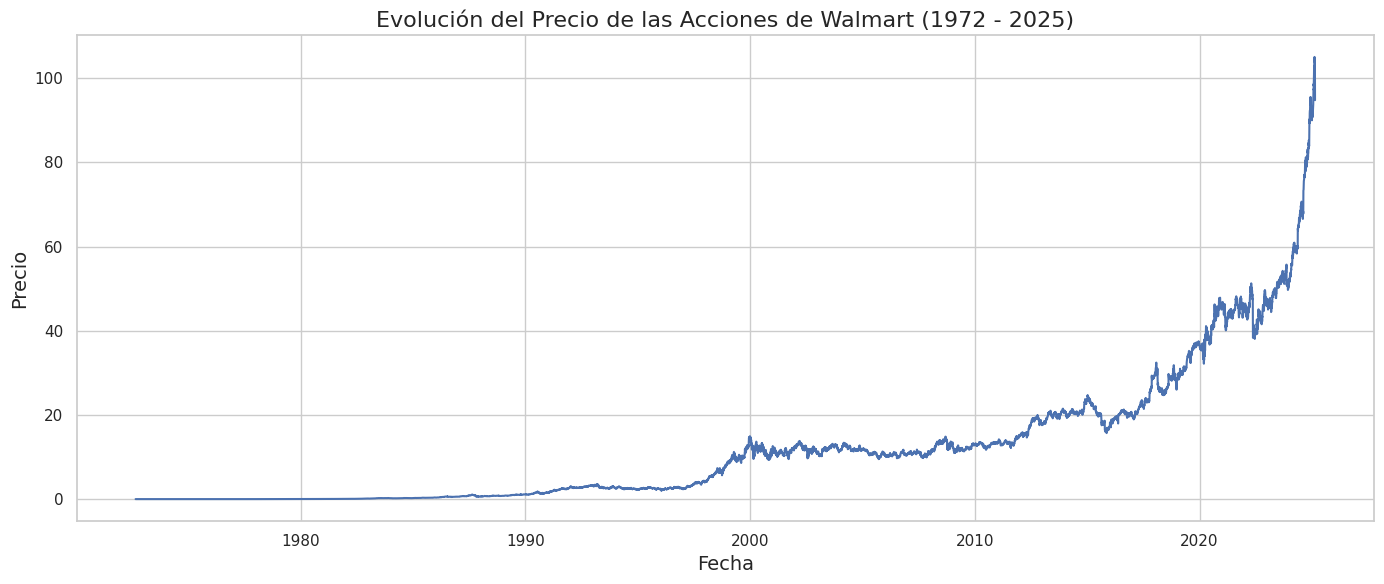

In [ ]:
import matplotlib.pyplot as plt

# Crear gr√°fico de serie temporal con los datos limpios
plt.figure(figsize=(14, 6))
plt.plot(walmart_clean_df['date'], walmart_clean_df['adj_close'], linewidth=1.5)
plt.title('Evoluci√≥n del Precio de las Acciones de Walmart (1972 - 2025)', fontsize=16)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Precio', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

Hallar  promedio, media, mediana, moda, desviaci√≥n est√°ndar y varianza.

In [ ]:
# Calcular estad√≠sticas b√°sicas
mean_value = walmart_clean_df['adj_close'].mean()  # Promedio
median_value = walmart_clean_df['adj_close'].median()  # Mediana
mode_value = walmart_clean_df['adj_close'].mode()[0]  # Moda (puede haber m√∫ltiples valores, tomamos el primero)
std_dev = walmart_clean_df['adj_close'].std()  # Desviaci√≥n est√°ndar
variance = walmart_clean_df['adj_close'].var()  # Varianza

# Resultados
stats_results = {
    "Promedio (Media)": mean_value,
    "Mediana": median_value,
    "Moda": mode_value,
    "Desviaci√≥n Est√°ndar": std_dev,
    "Varianza": variance
}

stats_results

{'Promedio (Media)': 11.946184229469727,
 'Mediana': 7.350796699523926,
 'Moda': 0.0068982178345322,
 'Desviaci√≥n Est√°ndar': 15.865461507019829,
 'Varianza': 251.71286883072787}

Identificar granularidad, ciclos, tendencia, estacionalidad, m√°ximo, m√≠nimos, picos, valles, razones de crecimiento y razones de reducci√≥n.

In [ ]:
# An√°lisis inicial de la serie temporal

# Granularidad: verificar diferencia entre fechas
date_diff = walmart_clean_df['date'].diff().value_counts().head()

# Identificar m√°ximos y m√≠nimos globales
max_price = walmart_clean_df.loc[walmart_clean_df['adj_close'].idxmax()]
min_price = walmart_clean_df.loc[walmart_clean_df['adj_close'].idxmin()]

# Para identificar picos y valles locales usamos scipy.signal
from scipy.signal import find_peaks

# Identificar picos locales
peaks_indices, _ = find_peaks(walmart_clean_df['adj_close'], distance=200)
peaks = walmart_clean_df.iloc[peaks_indices]

# Identificar valles locales (invertimos la serie para encontrar valles)
valleys_indices, _ = find_peaks(-walmart_clean_df['adj_close'], distance=200)
valleys = walmart_clean_df.iloc[valleys_indices]

# Resultados iniciales
initial_analysis_results = {
    "Granularidad (diferencias m√°s frecuentes entre fechas)": date_diff,
    "M√°ximo absoluto": max_price,
    "M√≠nimo absoluto": min_price,
    "N√∫mero de picos locales identificados": len(peaks),
    "N√∫mero de valles locales identificados": len(valleys)
}

initial_analysis_results


{'Granularidad (diferencias m√°s frecuentes entre fechas\n)': date
 1 days    10361
 3 days     2413
 4 days      323
 2 days      132
 5 days        2
 Name: count, dtype: int64,
 'M√°ximo absoluto': date         2025-02-13
 adj_close    105.050003
 Name: 13227, dtype: object,
 'M√≠nimo absoluto': date         1974-12-10
 adj_close      0.002839
 Name: 576, dtype: object,
 'N√∫mero de picos locales identificados': 54,
 'N√∫mero de valles locales identificados': 52}

**Granularidad:**



*   La mayor√≠a de los registros tienen una granularidad diaria (10361 observaciones con diferencia de 1 d√≠a).
*   Tambi√©n se observan saltos t√≠picos en fines de semana y d√≠as feriados (3 d√≠as de diferencia: 2413 casos).


**M√°ximo Absoluto:**
Precio m√°ximo: $105.05 (13 de febrero de 2025)

**M√≠nimo Absoluto:**
Precio m√≠nimo: $0.0028 (10 de diciembre de 1974)

**Picos y Valles Locales:**


*   N√∫mero de picos locales identificados: 54
*   N√∫mero de valles locales identificados: 52





### **Descomposici√≥n estacional**

Uso de seasonal_decompose para separar la serie en tendencia, estacionalidad y residuo.

Te ayuda a decidir si la serie muestra estacionalidad clara (por ejemplo, anual o de otra frecuencia)

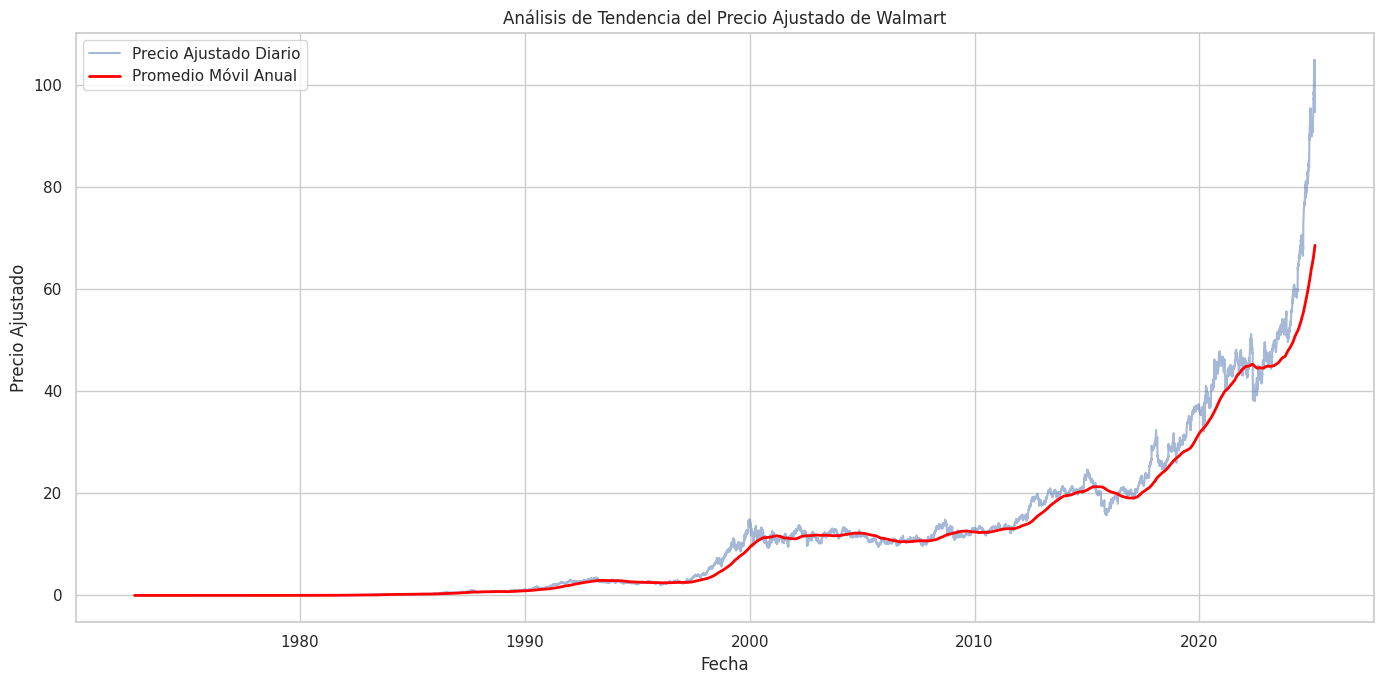

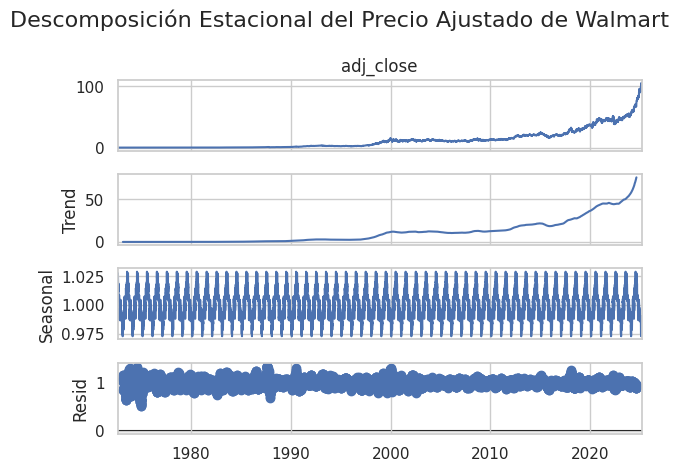

In [ ]:
import numpy as np
import matplotlib.dates as mdates

# A√±adir promedio m√≥vil para analizar tendencia general
walmart_clean_df['moving_avg'] = walmart_clean_df['adj_close'].rolling(window=365, min_periods=1).mean()

# Graficar la tendencia usando promedio m√≥vil
plt.figure(figsize=(14, 7))
plt.plot(walmart_clean_df['date'], walmart_clean_df['adj_close'], alpha=0.5, label='Precio Ajustado Diario')
plt.plot(walmart_clean_df['date'], walmart_clean_df['moving_avg'], color='red', linewidth=2, label='Promedio M√≥vil Anual')
plt.title('An√°lisis de Tendencia del Precio Ajustado de Walmart')
plt.xlabel('Fecha')
plt.ylabel('Precio Ajustado')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Estacionalidad: Realizar un an√°lisis de descomposici√≥n de serie temporal
from statsmodels.tsa.seasonal import seasonal_decompose

# Preparamos la serie con frecuencia diaria
series = walmart_clean_df.set_index('date')['adj_close']
series.index = pd.to_datetime(series.index)

# Usaremos un periodo anual (252 d√≠as burs√°tiles por a√±o aprox.)
decomposition = seasonal_decompose(series, model='multiplicative', period=252)

# Graficar la descomposici√≥n
decomposition.plot()
plt.suptitle('Descomposici√≥n Estacional del Precio Ajustado de Walmart', fontsize=16)
plt.tight_layout()
plt.show()


    A√±o  Crecimiento (%)
0  1973       -61.230548
1  1974       -28.536572
2  1975       177.850001
3  1976        18.767662
4  1977        31.967097


<ipython-input-35-3cc2ec4ca793>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=annual_growth_df, x='A√±o', y='Crecimiento (%)', palette='coolwarm')


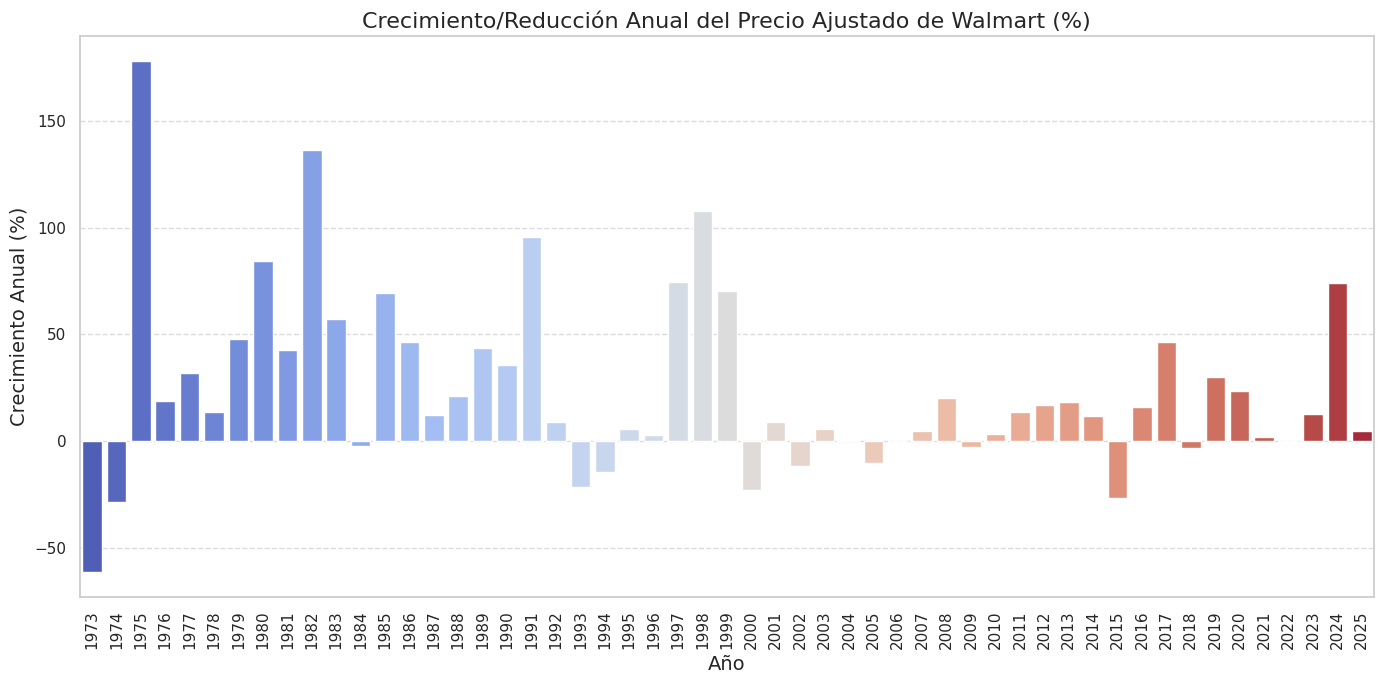

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Asegurar que la columna 'date' est√© correctamente en formato datetime
walmart_clean_df['date'] = pd.to_datetime(walmart_clean_df['date'])

# Extraer el a√±o usando .dt.year
walmart_clean_df['year'] = walmart_clean_df['date'].dt.year

# Obtener el √∫ltimo precio ajustado (adj_close) de cada a√±o
annual_prices = walmart_clean_df.groupby('year')['adj_close'].last()

# Calcular razones de crecimiento/reducci√≥n anual (en porcentaje)
annual_growth = annual_prices.pct_change() * 100

# Convertir a DataFrame para visualizaci√≥n
annual_growth_df = annual_growth.dropna().reset_index()
annual_growth_df.columns = ['A√±o', 'Crecimiento (%)']

# Mostrar DataFrame resultante
print(annual_growth_df.head())

# Gr√°fica de razones anuales de crecimiento/reducci√≥n
plt.figure(figsize=(14, 7))
sns.barplot(data=annual_growth_df, x='A√±o', y='Crecimiento (%)', palette='coolwarm')

# Mejorar presentaci√≥n gr√°fica
plt.xticks(rotation=90)
plt.title('Crecimiento/Reducci√≥n Anual del Precio Ajustado de Walmart (%)', fontsize=16)
plt.xlabel('A√±o', fontsize=14)
plt.ylabel('Crecimiento Anual (%)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


### Identificaci√≥n de picos y valles

Uso de find_peaks (y su inverso para valles) para localizar m√°ximos y m√≠nimos locales.

Si bien no es un paso cl√°sico en Box-Jenkins, el an√°lisis exploratorio contribuye a entender la din√°mica de la serie (momentos de cambio brusco, outliers, etc.).


üîπ Granularidad de la serie temporal (frecuencia m√°s com√∫n de registros):
date
1 days    10361
3 days     2413
4 days      323
2 days      132
5 days        2
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


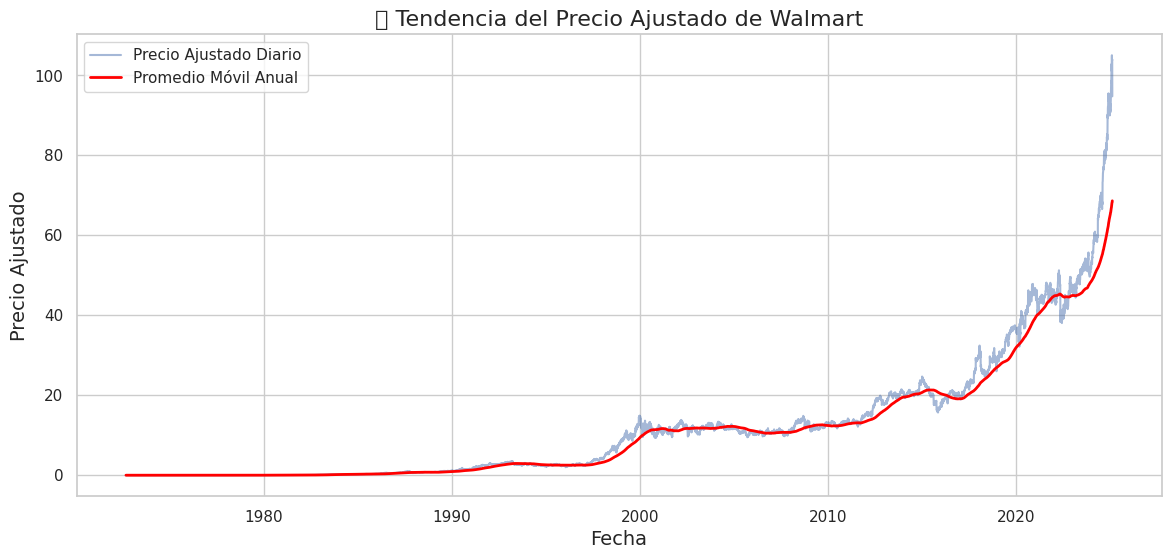

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


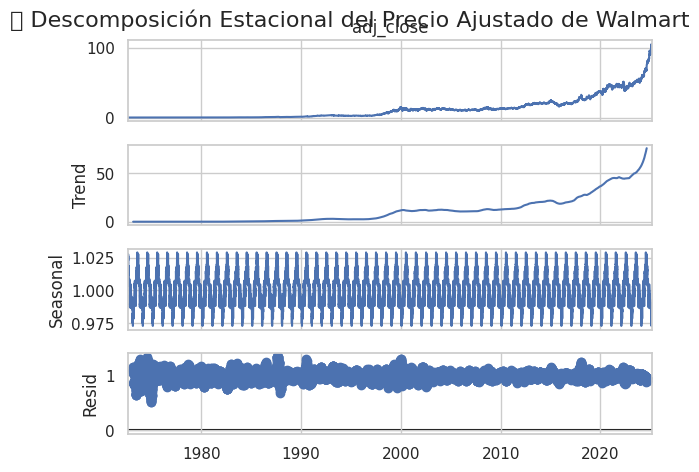


üîπ M√°ximo absoluto: 105.0500030517578 el 2025-02-13 00:00:00
üîπ M√≠nimo absoluto: 0.0028387149795889 el 1974-12-10 00:00:00


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


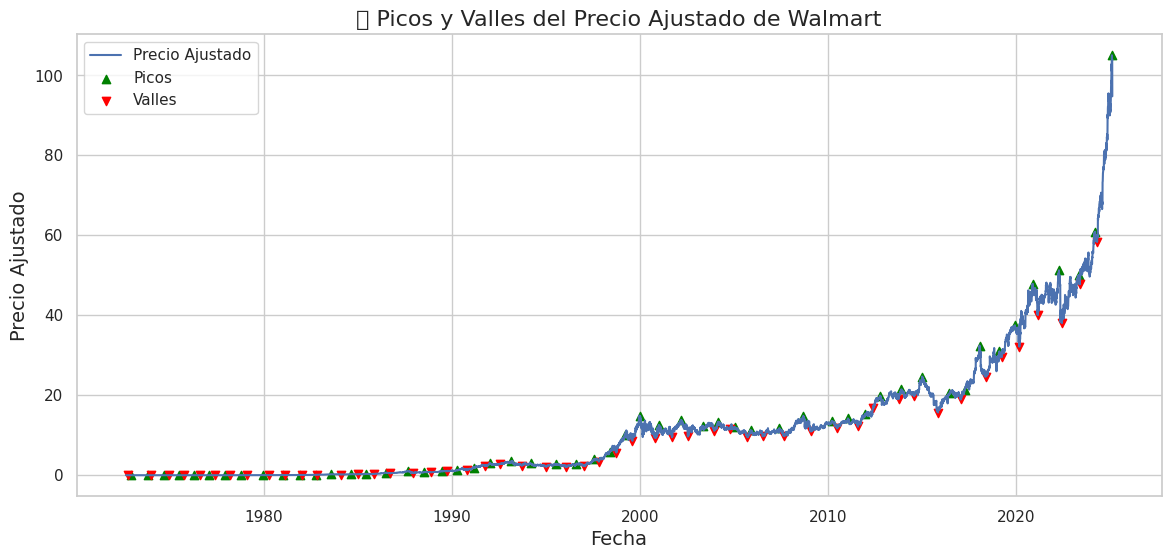


üîπ N√∫mero de picos locales detectados: 54
üîπ N√∫mero de valles locales detectados: 52


<ipython-input-39-83f8f6b886f5>:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=annual_growth_df, x='A√±o', y='Crecimiento (%)', palette='coolwarm')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


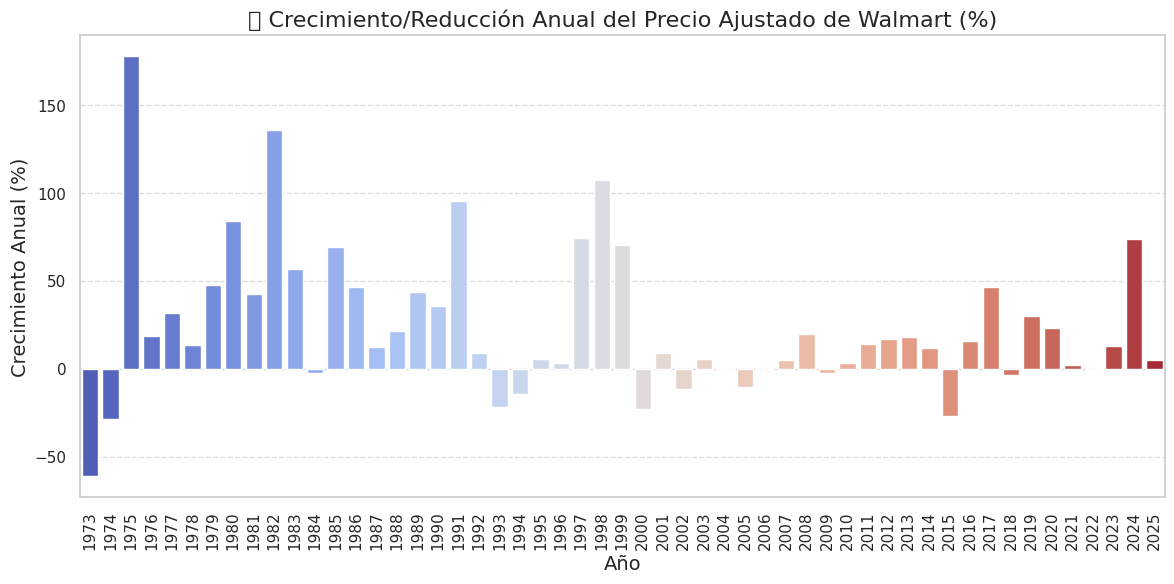

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import find_peaks
from statsmodels.tsa.seasonal import seasonal_decompose

# üîπ 1. Cargar y preparar datos
# Asegurar formato datetime en la columna de fechas
walmart_clean_df['date'] = pd.to_datetime(walmart_clean_df['date'])

# üîπ 2. GRANULARIDAD
# Identificar la diferencia de d√≠as m√°s com√∫n entre registros
date_diff = walmart_clean_df['date'].diff().value_counts().head()
print("\nüîπ Granularidad de la serie temporal (frecuencia m√°s com√∫n de registros):")
print(date_diff)

# üîπ 3. TENDENCIA (Promedio M√≥vil Anual)
walmart_clean_df['moving_avg'] = walmart_clean_df['adj_close'].rolling(window=365, min_periods=1).mean()

# Gr√°fico de tendencia
plt.figure(figsize=(14, 6))
plt.plot(walmart_clean_df['date'], walmart_clean_df['adj_close'], alpha=0.5, label='Precio Ajustado Diario')
plt.plot(walmart_clean_df['date'], walmart_clean_df['moving_avg'], color='red', linewidth=2, label='Promedio M√≥vil Anual')
plt.title('üîπ Tendencia del Precio Ajustado de Walmart', fontsize=16)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Precio Ajustado', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# üîπ 4. ESTACIONALIDAD Y CICLOS (Descomposici√≥n de la serie temporal)
# Convertir la serie en √≠ndice de tiempo
series = walmart_clean_df.set_index('date')['adj_close']
series.index = pd.to_datetime(series.index)

# Descomposici√≥n usando un periodo anual (252 d√≠as burs√°tiles por a√±o)
decomposition = seasonal_decompose(series, model='multiplicative', period=252)

# Graficar la descomposici√≥n estacional
decomposition.plot()
plt.suptitle('üîπ Descomposici√≥n Estacional del Precio Ajustado de Walmart', fontsize=16)
plt.show()

# üîπ 5. M√ÅXIMOS Y M√çNIMOS ABSOLUTOS
max_price = walmart_clean_df.loc[walmart_clean_df['adj_close'].idxmax()]
min_price = walmart_clean_df.loc[walmart_clean_df['adj_close'].idxmin()]
print(f"\nüîπ M√°ximo absoluto: {max_price['adj_close']} el {max_price['date']}")
print(f"üîπ M√≠nimo absoluto: {min_price['adj_close']} el {min_price['date']}")

# üîπ 6. PICOS Y VALLES LOCALES
# Encontrar picos (m√°ximos locales)
peaks_indices, _ = find_peaks(walmart_clean_df['adj_close'], distance=200)
peaks = walmart_clean_df.iloc[peaks_indices]

# Encontrar valles (m√≠nimos locales)
valleys_indices, _ = find_peaks(-walmart_clean_df['adj_close'], distance=200)
valleys = walmart_clean_df.iloc[valleys_indices]

# Graficar con picos y valles marcados
plt.figure(figsize=(14, 6))
plt.plot(walmart_clean_df['date'], walmart_clean_df['adj_close'], label='Precio Ajustado')
plt.scatter(peaks['date'], peaks['adj_close'], color='green', label='Picos', marker='^')
plt.scatter(valleys['date'], valleys['adj_close'], color='red', label='Valles', marker='v')
plt.title('üîπ Picos y Valles del Precio Ajustado de Walmart', fontsize=16)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Precio Ajustado', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

print(f"\nüîπ N√∫mero de picos locales detectados: {len(peaks)}")
print(f"üîπ N√∫mero de valles locales detectados: {len(valleys)}")

# üîπ 7. RAZONES DE CRECIMIENTO Y REDUCCI√ìN
# Extraer el a√±o de cada fecha
walmart_clean_df['year'] = walmart_clean_df['date'].dt.year

# Obtener el √∫ltimo precio ajustado de cada a√±o
annual_prices = walmart_clean_df.groupby('year')['adj_close'].last()

# Calcular tasas de crecimiento/reducci√≥n anuales (%)
annual_growth = annual_prices.pct_change() * 100

# Convertir en DataFrame para visualizaci√≥n
annual_growth_df = annual_growth.dropna().reset_index()
annual_growth_df.columns = ['A√±o', 'Crecimiento (%)']

# Gr√°fico de razones de crecimiento/reducci√≥n
plt.figure(figsize=(14, 6))
sns.barplot(data=annual_growth_df, x='A√±o', y='Crecimiento (%)', palette='coolwarm')
plt.xticks(rotation=90)
plt.title('üîπ Crecimiento/Reducci√≥n Anual del Precio Ajustado de Walmart (%)', fontsize=16)
plt.xlabel('A√±o', fontsize=14)
plt.ylabel('Crecimiento Anual (%)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


En t√©rminos de la metodolog√≠a Box-Jenkins, todo esto corresponde a la ‚ÄúIdentificaci√≥n‚Äù:

* Ver si la serie es estacionaria o si hay que diferenciarla.

* Ver la estacionalidad.

* Reconocer patrones de autocorrelaci√≥n.

# Conclusiones de la metodolog√≠a

La parte de la metodolog√≠a Box-Jenkins que se est√° aplicando al c√≥digo, se basa esencialmente en la fase de **Identificaci√≥n** de esta. Donde se realiza la exploraci√≥n profunda de la serie para decidir, posteriormente, c√≥mo modelarla en los siguientes pasos.
